# Support Vector Machine (SVM)

Researcher and computer scientist Vladimir Vapnik published in 1995 a paper while working at AT&T Bell Laboratories which introduced the idea of a support-vector network, which today are better known as a Support Vector Machine (SVM). These are so-called supervised max-margin models usually employed for classification and regression analysis [1, 12]. 

The SVM model is a general method that has had a lot of success largely due to its pleasant convex optimization objective function and thus that it guarantees a global solution; given that the data can be separated in some feature space. In fact, the optimization depends **only on the dot product of pairs of samples**, which has some notable advantages in explainability and computational efficiency in higher dimensions, but also disadvantages when it comes to computational complexity of the learning algorithm. We will go into greater detail on this later in the notebook.

The originally proposed SVM perfoms linear classification but it can be extended to learn non-linear decision boundaries as well by using what is called the kernel trick. The kernel trick is used to map pairwise data samples to an arbitrary vector space where the data might be linearly separable by a hyperplane. What makes this such a nice technique is the fact that the coordinates of the samples do not need to be computed in the higher order vector space, in fact, only the inner product needs to be calculated to produce a scalar value. This is computationally efficient and is one of the characteristics which make SVMs appealing to use for non-linear datasets [2].


## Mathematical description

Given the training dataset $(\bar{x}_i, y_i) \in D$, where $|D| = n$, $\bar{x}_i \in \mathbb{R}^p$, and $y_i \in \{-1, 1\}$ we want to find the maximum-margin hyperplane with normal vector $\bar{w} \in \mathbb{R}^p$ which separates the group of points $\bar{x}_i$ and $\bar{x}_j$ for which $y_i \neq y_j$. The hyperplane is written as 

$$
\bar{w}^T\bar{x} + b = 0
$$

where the parameter $b$ determines the offset of the hyperplane from the origin along the normal vector $\bar{w}$. For a hard-margin, i.e. when the dataset $D$ is linearly separable (in some space), we aim to find one or more hyperplanes that separate the classes of data such that the distance between them is as large as possible. The maxmimum-margin hyperplane lies exactly between the other hyperplanes, and is the one we are trying to find [7].

The hyperplanes that lie at the border of this margin are called supporting hyperplanes and are guaranteed to have one or more samples $\bar{x}_i$ exactly on it. The samples that exist on the supporting hyperplanes, i.e. the margins, are usually referred to as support vectors. For the case of a binary classifier, i.e. where $y_i \in \{-1, 1\}$, we can defines these two supporting hyperplanes as

$$
\begin{align*}

& \bar{w}^T\bar{x} + b = 1, \ \ & \text{if} \ y_i = 1, \\
& \bar{w}^T\bar{x} + b = -1, \ \ & \text{if} \ y_i = -1

\end{align*}
$$

and can be rewritten more efficiently as

$$
y_i(\bar{w}^T\bar{x}_i + b) \geq 1
$$

which if you check by plugging in some numbers is exactly the same equations as above. Visually these two supporting hyperplanes could look something like the plot below where we clearly can see two (in this case) lines that create a maximum-margin between the samples of the different classes, and the maximum-margin hyperplane is seen as the black line precisely in the middle of the other two lines [8].

We can also see some other vectors which we will go through below.


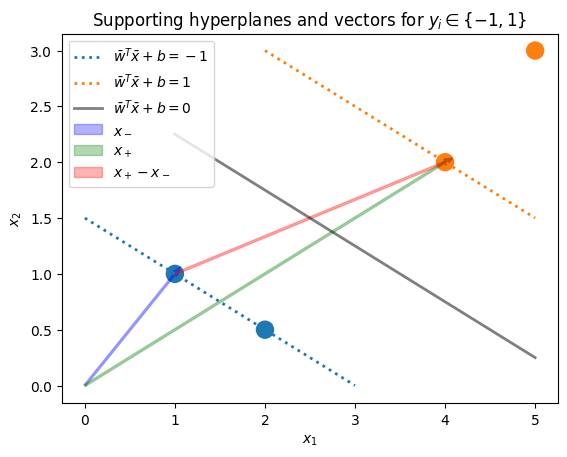

In [8]:
import numpy as np
import matplotlib.pyplot as plt

nsh_xx = np.linspace(0, 3, 10)
psh_xx = np.linspace(2, 5, 10)
mm_xx = np.linspace(1, 5, 10)

# Negative supporting hyperplane
plt.plot(nsh_xx, -0.5 * nsh_xx + 1.5, lw=2, c="tab:blue", label=r"$\bar{w}^T\bar{x} + b = -1$", ls=":")
# Positive supporting hyperplane
plt.plot(psh_xx, -0.5 * psh_xx + 4, lw=2, c="tab:orange", label=r"$\bar{w}^T\bar{x} + b = 1$", ls=":")

plt.plot(mm_xx, -0.5 * mm_xx + 2.75, lw=2, c="black", label=r"$\bar{w}^T\bar{x} + b = 0$", alpha=0.5)

plt.scatter([1, 2, 4, 5], [1, 0.5, 2, 3], c=["tab:blue", "tab:blue", "tab:orange", "tab:orange"], s=150)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Vector representing one 
plt.arrow(0, 0, 1, 1, width=0.02, color="blue", label=r"$x_-$", alpha=0.3)
plt.arrow(0, 0, 4, 2, width=0.02, color="green", label=r"$x_+$", alpha=0.3)
plt.arrow(1, 1, 3, 1, width=0.02, color="red", label=r"$x_+ - x_-$", alpha=0.3)
plt.legend()
plt.title(r"Supporting hyperplanes and vectors for $y_i \in \{-1, 1\}$")
plt.show()


The question now is, how wide is this margin that we have between the supporting hyperplanes? We need to be able to calculate this because this is precisely the component that we want to maximize. 

To answer that we can employ some linear algebra. Given the support vectors $x_+$ and $x_-$ which both lie on the respective supporting hyperplanes, we can calculate the width between the supporting hyperplanes by projecting the difference vector $(x_+ - x_-)$ onto the unit vector of the margin. We know the normal vector of this margin as $\bar{w}$ and so we can calculate this width as

$$
\text{width} = (x_+ - x_-) \cdot \frac{\bar{w}}{\| w \|}
$$

because the projection of the difference vector is done through the dot product between the vectors. You can see the difference vector $(x_+ - x_-)$ as the red arrow in the plot above, and the respective support vectors as blue and green arrows [3].

We can reformulate the above equation by expanding it and using the constraints for the supporting hyperplanes which we defined above in order to arrive at a more workable equation as follows

$$
\begin{align*}

\text{width} & = \frac{\bar{w}\cdot x_+ - \bar{w}\cdot x_-}{\| \bar{w} \|} \\
& = \frac{1 - b -(-1 - b)}{\| w \|} \\
& = \frac{2}{\| w \|}.

\end{align*}
$$

The objective function of the maximum-margin problem is as such to maximize the inverted Euclidean norm of the margin normal vector, while satisfying the constraints imposed on the supporting hyperplanes. The optimization problem defining our support vector machine is thus defined as

$$
\begin{align*}

\underset{\bar{w}, b}{\text{maximize}} \ \ & \frac{2}{\| w \|} \\
\text{subject to} \ \ & y_i (\bar{w}^T\bar{x}_i + b) \geq 1, \ \ \forall i \in \{ 1, \dots, n \}

\end{align*}
$$

However, we can rework this formulation to be easier to solve. Quadratic programming is a deeply researched field of mathematics defining processes for solving certain optimization problems involving quadratic functions and linear constraints [6]. In the optimization problem defined above, we do not have a quadratic objective function, but we do have linear constraints. So let us rewrite the objective function to be quadratic.


First of all, we can remove or add any constants tied to our parameters freely, since this only scales the expression generally and produces the same min or max values. Secondly, we can invert a maximization problem to produce a minimization problem, and vice versa. Knowing this, we can rewrite the original objective function as 

$$
\begin{align*}

\underset{\bar{w}, b}{\text{minimize}} \ \ & \frac{1}{2} \| w \| ^2 \\
\text{subject to} \ \ & y_i (\bar{w}^T\bar{x}_i + b) \geq 1, \ \ \forall i \in \{ 1, \dots, n \}

\end{align*}
$$

which is quadratic and still contains only linear constraints. We introduce the $\frac{1}{2}$ term because it has pleasant implications for the derivative of the function (which we will see later). Also, this has become an optimization of a convex function which guarantees that we can find a *unique* global minimum to the problem [4, 6].

Ok, but how do we deal with actually solving this equation and finding a solution to the optimization problem? The method of Lagrange multipliers is a strategy for finding the local maximum or minimum of a function subject to constraints. Hence, we can use Lagrange multipliers to find an analytical solution to our optimization problem of finding the maximum margin.

The general Lagrangian is defined as

$$
\mathcal{L}(x, \lambda) \equiv f(x) + \langle \lambda, g(x) \rangle
$$

for the function $f$ and our constraint $g$, where $\lambda$ is called the Lagrange multiplier [5]. To find the maximum or minimum of $f$ we seek to find the expressions for when all the partial derivatives are equal to zero, which means that we have found the stationary point of $\mathcal{L}$, subject to the equality constraint $g(x) = 0$.

In our case, we have $n$ different constraints, one for each of our data samples $\bar{x}_i$. In such a case, we also need $n$ number of Lagrange multipliers, which could look like

$$
\mathcal{L}(x, \bar{\lambda}) \equiv f(x) + \sum_i \lambda_i \cdot g(x)
$$

where $\bar{\lambda}$ now is a vector of all our multipliers. Rewriting our original optimization problem using the Lagrange multiplier method, and using $\alpha$ instead of $\lambda$ as notation, we end up with the following expression

$$
\mathcal{L}(\bar{w}, b, \bar{a}) = \frac{1}{2} \| w \| ^2 - \sum_i \alpha_i \Bigl( y_i (\bar{w}^T \bar{x_i} + b) - 1 \Bigr)
$$

where $\bar{\alpha} = (\alpha_1, \dots, \alpha_n), \ \alpha_i > 0 \ \forall i$, and note the minus sign in front of the Lagrange multiplier term, because we are minimizing with respect to $\bar{w}$ and $b$ [8]. Next, to actually find a solution to the Lagrangian we need to find the stationary points, which we can do by setting the partial derivates with respect to our parameters equal to zero. If we start off with $\bar{w}$ we get

$$
\begin{align*}

\frac{\partial \mathcal{L}}{\partial \bar{w}} & = \bar{w} - \sum_i \alpha_i y_i \bar{x}_i \\
\bar{w} & = \sum_i \alpha_i y_i \bar{x}_i

\end{align*}
$$

which means that the maximum margin hyperplane $\bar{w}$ is exactly a linear sum of each sample $(\bar{x}_i, y_i) \in D$ weighted by the Lagrange multipliers $\alpha_i$. Taking the partial derivative with respect to $b$ we get

$$
\begin{align*}

\frac{\partial \mathcal{L}}{\partial b} & = \bar{w} - \sum_i \alpha_i y_i \\
\sum_i & \alpha_i y_i = 0

\end{align*}
$$

which tells us that the optimal solution exists where the weighted sum of the Lagrange multipliers is equal to zero. Merging all of this together, we can utilize these new two conditions in our original Lagrangian to achieve the *dual representation* for our maximization problem. Substituting for $\bar{w}$ and $b$ we get the following

$$
\begin{align*}

\mathcal{L}(\bar{w}, b, \bar{\alpha}) = \ & \frac{1}{2} \Bigl( \sum_i \alpha_i y_i \bar{x}_i \Bigr) \cdot \Bigl( \sum_j \alpha_j y_j \bar{x}_j \Bigr) \\
& - \Bigl( \sum_i \alpha_i y_i \bar{x}_i \Bigr) \cdot \Bigl( \sum_j \alpha_j y_j \bar{x}_j \Bigr) \\
& - b\sum_i \alpha_i y_i + \sum_i \alpha_i

\end{align*}
$$

simplifying some by grouping the two summations inside the dot products, and utilizing the fact that we previously concluded that $\sum_i \alpha_i y_i = 0$, we can arrive at the equation which we aim to maximize

$$
\begin{align*}

\mathcal{L}(\bar{\alpha}) = \sum_i \alpha_i - & \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \bar{x}_i \cdot \bar{x}_j \\
\text{s.t.} \ & 0 \leq \alpha_i, \ \forall i \\
\text{and} \ & \sum_i y_i\alpha_i = 0

\end{align*}
$$

which tells us that the optimization problem of finding the maximum-margin hyperplane depends only on dot products between the pairs of samples $\bar{x}_i, \bar{x}_j \in D$ and their interaction with the Lagrange multipliers $\alpha_i$ [12]. Furthermore, if we allow some points to be missclassified but penalized with amount $C$, then the constraints of the Lagrange multipliers instead become

$$
0 \leq \alpha_i \leq C, \ \forall i
$$

which means that points with $\alpha_i = 0$ it is outside the decision boundary and does not contribute to the prediction. The points with $\alpha_i = C$ lie close to the margin and might either be classified correctly or not. Points with non-zero $\alpha_i \ll C$ are, as we already know, called support vectors and lie either on, or close to, the supporting hyperplanes [16].

Okay, now we want to **maximize** this Lagrangian $\mathcal{L}$ with respect to $\bar{\alpha}$ but before we had defined an optimization problem to **minimize**, why do we all of a sudden want to maximize instead?

This has to do what is known as the *duality principle* and is the principle that optimization problems may be viewed from either of two perspectives; the **primal problem** or the **dual problem**. In our case, our original minimization problem was the primal, and when defining the Lagrangian we end up with the dual formulation. If the primal is a minimization problem, then the dual is a maximization problem, and vice versa [10].

As stated, we have arrived at an expression for our optimization problem which depends solely on our Lagrange multipliers and the dot product between the samples. Because of this, we can reformulate the problem using kernels, which allows our support vector machine to be applied efficiently to arbitrary feature spaces [8]. Rewriting with the kernel formulation we end up with our final expression

$$
\mathcal{L}(\bar{\alpha}) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j k(\bar{x}_i, \bar{x}_j).
$$

But what is a kernel? As briefly mentioned in the introduction, the support vector machine utilizes something that is known as the *kernel method* which allows us to operate in high-dimensional, implicit, feature spaces $\mathcal{H}$ without ever needing to calculate the coordinates of the samples in that space [2]. How? Because we only need to compute the dot product of the samples in the space, not the coordinates themselves. Given a (potentially) nonlinear feature space mapping $\phi(\bar{x}): \mathbb{R}^p \mapsto \mathcal{H}$ the kernel function is given by

$$
k(\bar{x}, \bar{x}') = \phi(\bar{x})^T \phi(\bar{x}')
$$

which we can see is a symmetric function of its arguments because $k(\bar{x}, \bar{x}') = k(\bar{x}', \bar{x})$. If we substitute this expression for $k$ in the above formula we see that

$$
\mathcal{L}(\bar{\alpha}) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \phi(\bar{x}_i) \cdot \phi(\bar{x}_j).
$$

our dual representation is expressed using only the dot product between our samples even with our arbitrary feature mapping $\phi()$. In order to use the kernel substitution, first we need to be able to construct valid kernel functions. A valid kernel function is precisely one that ensures that the function corresponds to a dot product in some feature space $\mathcal{H}$. One could choose a feature space mapping $\phi(\bar{x})$ and then use that to find its corresponding kernel, but that can be tricky. An alternative approach is to construct the kernel function directly, and then ensuring that it is valid.

Let us consider the very simple example with the kernel function given by

$$
k(\bar{x}, \bar{z}) = (\bar{x}^T \bar{z})^2
$$

and if we assume that $\bar{x}, \bar{z} \in \mathbb{R}^2$ we can expand the terms and identify the corresponding nonlinear feature mapping accordingly

$$
\begin{align*}

k(\bar{x}, \bar{z}) & = (\bar{x}^T \bar{z})^2 = (x_1 z_1 + x_2 z_2)^2 \\
& = x_1^2z_1^2 + 2x_1z_1x_2z_2 + x_2^2z_2^2 \\
& = (x_1^2, \sqrt{2}x_1x_2, x_2^2)(z_1^2, \sqrt{2}z_1z_2, z_2^2)^T \\
& = \phi(\bar{x})^T \phi(\bar{z}).

\end{align*}
$$

which tells us that the feature mapping is $\phi(\bar{x}) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)^T$. But always explicitly constructing the feature mapping function $\phi(\bar{x})$ is cumbersome, so we would like an alternative way of knowing whether a function is a valid kernel [8]. We can do this using the Gram matrix $K$, whose elements are given by $k(\bar{x}_i, \bar{x}_j)$. A condition for a valid kernel is that the $K$ is positive semidefinitive for all possible choices of $\{ \bar{x} \}$ [17]. 

Above we saw the case of the specific polynomial kernel $k(\bar{x}, \bar{z}) = (\bar{x}^T \bar{z})^2$, but we can consider a more generalized polynomial kernel as $k(\bar{x}, \bar{z}) = (\bar{x}^T \bar{z} + c)^d$ where $d$ is the degree of the polynomial and $c$ is a linear constant. An extremely common kernel is the Gaussian kernel, which takes the form

$$
k(\bar{x}, \bar{z}) = \text{exp} \Bigl( \frac{-\| \bar{x} - \bar{z} \|^2}{2\sigma^2} \Bigr)
$$

and we can see that it is a valid kernel if we expand the squared term

$$
\begin{align*}

\| \bar{x} - \bar{z} \|^2 & = \bar{x}^T \bar{x} + \bar{z}^T \bar{z} - 2\bar{x}^T \bar{z} \\
\Rightarrow k(\bar{x}, \bar{z}) & = \text{exp} \Bigl( \frac{-\bar{x}^T \bar{x}}{2\sigma^2} \Bigr) \text{exp} \Bigl( \frac{\bar{x}^T \bar{z}}{\sigma^2} \Bigr) \text{exp} \Bigl( \frac{-\bar{z}^T \bar{z}}{2\sigma^2} \Bigr).

\end{align*}
$$

Great, so know we know how to formulate our optimization problem for the support vector machine, we know about some different kernels we can use to model the maximum-margin decision boundary, but how do we go about solving the dual formulation we arrived at above?


One approach to solving the primal, which is a quadratic programming problem, is to utilize the Sequential Minimal Optimization (SMO) algorithm. It is an iterative algorithm which breaks the problem into a series of the smallest possible sub-problems that can be solved analytically, which they are. Since we have linear equality constraints in the primal, involving our Lagrange multipliers $\alpha_i$, we know that the smallest possible problem involves two such multipliers [19]. As such, for any two multipliers $\alpha_1$ and $\alpha_2$ the constraints are reduced to

$$
\begin{align*}

& 0 \leq \alpha_1, \alpha_2, \leq C \\
& 0 = y_1\alpha_1 + y_2\alpha_2 + \sum_{i=3} y_i\alpha_i

\end{align*}
$$

where the summation comes from our previous constraint derived through the derivative of the primal with respect to $b$. The algorithm follows these steps:

1) Find a Lagrange multiplier $\alpha_1$ which violates the Karush-Kuhn-Tucker conditions for the primal.
2) Pick a second multiplier $\alpha_2$ and optimize the pair $(\alpha_1, \alpha_2)$.
3) Repeat steps 1 and 2 until convergence.

When all the Lagrange multipliers $\alpha_i$ satisfy the Karush-Kuhn-Tucker conditions the problem has been solved. The constant $C$ is a hyperparameter of the model which lets us control the trade-off between maximum margin and error [14, 15].

We first need to compute the constraints on the two multipliers $\alpha_1$ and $\alpha_2$ and then solve for the constrained minimum. Because we have the bounding constraints on our Lagrange multipliers, $0 \leq \alpha_i \leq C$, we know that they lie inside of a box, furthermore, from the derivative of $\mathcal{L}$ with respect to $b$ we know that the Lagrange multipliers actually lie on a diagonal of the box due to the linear equality constraint

$$
\sum_i \alpha_i y_i = 0.
$$

SMO is designed two optimize a pair of Lagrange multipliers because if we only aimed to optimize one multiplier, the above equality constraint could not be satisfied at every step. In other words, one step of the SMO must find an optimum of the objective function on the diagonal line segment. If the labels for the multipliers $y_1$ and $y_2$ are equal or not, the diagonal either has a positive or a negative derivative. The algorithm first computes the second Lagrange multiplier $\alpha_2$ and then computes the ends of the diagonal line segment in terms of $\alpha_2$. If $y_1 \neq y_2$ then these bounds apply to $\alpha_2$

$$
\begin{align*}

L = & \max (0, \alpha_2 - \alpha_1) \\
H = & \min (C, C + \alpha_2 - \alpha_1)

\end{align*}
$$

and if $y_1 = y_2$ then the following bounds apply to $\alpha_2$

$$
\begin{align*}

L = & \max (0, \alpha_2 + \alpha_1 - C) \\
H = & \min (C, \alpha_2 - \alpha_1)

\end{align*}
$$

and the second derivative of the objective function along the diagonal line can be expressed as

$$
\eta = k(\bar{x}_1, \bar{x}_1) + k(\bar{x}_2, \bar{x}_2) - 2k(\bar{x}_1, \bar{x}_2).
$$

In the normal case, were the objective function is positive definite, the algorithm computes the minimum along the direction of the constraint based on the error of the $i^{\text{th}}$ training sample,

$$
\alpha_2^{\text{new}} = \alpha_2 + \frac{y_2(E_1 - E_2)}{\eta}
$$

where $E_i = \hat{y}_i - y_i$. The next step of the algorithm is to find the constrained minimum by clipping the unconstrained minimum to the ends of the line segment (diagonal)

$$
\alpha_2^{\text{new, clipped}} =
\begin{cases}
H & \text{if} & \alpha_2^{\text{new}} \geq H, \\
\alpha_2^{\text{new}} & \text{if} & L < \alpha_2^{\text{new}} < H, \\
L & \text{if} & \alpha_2^{\text{new}} \leq L. \\
\end{cases}
$$

The value of the other Lagrange multiplier $\alpha_1$ is computed from the newly found $\alpha_2^{\text{new, clipped}}$ as

$$
\alpha_1^{\text{new}} = \alpha_1 + y_1y_2(\alpha_2 - \alpha_2^{\text{new, clipped}}).
$$

The Sequential Minimal Optimization algorithm will move the Lagrange multipliers of the dual formulation to the end point of the bounded constraints that has the lowest value of the objective function, leading us to minimize the dual, and maximizing the margin as we wanted [19].


(20, 2) (20,)


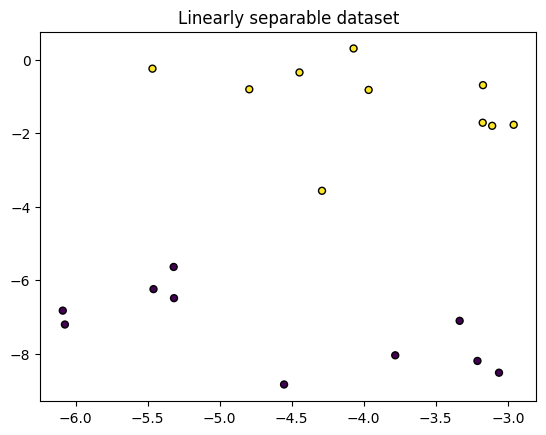

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20, centers=2, n_features=2, random_state=1337)
print(X.shape, y.shape)

plt.title("Linearly separable dataset")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()


## References

- [1] Corinna Cortes & Vladimir Vapnik, "Support-vector networks", Mach Learn 20, 273–297 (1995), https://doi.org/10.1007/BF00994018.
- [2] "Kernel method", Wikipedia, visited 2024-09-09, https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick.
- [3] "Why is the SVM margin equal to $\frac{2}{||w||}$", Mathematics Stack Exchange, https://math.stackexchange.com/questions/1305925/why-is-the-svm-margin-equal-to-frac2-mathbfw
- [4] Patrick H. Winston, "Lecture 16: Learning: Support Vector Machines", MIT OpenCourseWare, https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-16-learning-support-vector-machines/
- [5] "Lagrange multiplier", Wikipedia, visited 2024-09-09, https://en.wikipedia.org/wiki/Lagrange_multiplier
- [6] "Quadratic programming", Wikipedia, visited 2024-09-10, https://en.wikipedia.org/wiki/Quadratic_programming
- [7] R. Berwick, "An Idiot's guide to Support vector machines (SVMs)", https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf
- [8] Christopher M. Bishop, "Pattern Recognition and Machine Learning", https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf
- [9] "Why do we try to maximize Lagrangian in SVMs?", CS Stack Exchange, https://cs.stackexchange.com/questions/77368/why-do-we-try-to-maximize-lagrangian-in-svms
- [10] "Duality (optimization)", Wikpedia, visited 2024-09-10, https://en.wikipedia.org/wiki/Duality_(optimization)
- [11] "Support Vector Machines", SciKit Learn, visited 2024-09-10, https://scikit-learn.org/stable/modules/svm.html#implementation-details
- [12] Boser, Bernhard & Guyon, Isabelle & Vapnik, Vladimir. (1996). A Training Algorithm for Optimal Margin Classifier. Proceedings of the Fifth Annual ACM Workshop on Computational Learning Theory. 5. 10.1145/130385.130401.
- [13] Suraj Donthi, "Support Vector Machines, Dual Formulation, Quadratic Programming & Sequential Minimal Optimization", visited 2024-09-15 https://towardsdatascience.com/support-vector-machines-dual-formulation-quadratic-programming-sequential-minimal-optimization-57f4387ce4dd
- [14] "Sequential minimal optimization", Wikipedia, visited 2024-09-15, https://en.wikipedia.org/wiki/Sequential_minimal_optimization
- [15] "Karush–Kuhn–Tucker conditions", Wikipedia, visited 2024-09-15, https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions
- [16] Lucien East, Implement SVM with SMO from scratch in Python, GitHub, visited 2024-09-15, https://lucien-east.github.io/2022/07/30/Implement-SVM-with-SMO-from-scratch/
- [17] "Definite matrix", Wikipedia, visited 2024-09-17, https://en.wikipedia.org/wiki/Definite_matrix
- [18] Girrajjangid, "Sequential Minimal Optimization", GitHub, visited 2024-09-17, https://github.com/Girrajjangid/Machine-Learning-from-Scratch/blob/master/Support%20Vector%20Machine/5.%20Sequential%20Minimal%20Optimization%20(%20SMO%20).ipynb
- [19] John C. Platt, "Fast Training of Support Vector Machines using Sequential Minimal Optimization", https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/smo-book.pdf
